## Example: K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as sp_dist
import seaborn

from scratch.algos.kmeans import KMeans

plt.rcParams["figure.figsize"] = (20, 8)
seaborn.set(font_scale=1.5)
seaborn.set_style("whitegrid")

In [2]:
X = np.loadtxt("../data/Q4Test.txt", skiprows=1)

In [3]:
N = X.shape[0]

idx = np.array(range(N))
idx_train = np.random.choice(idx, 140, replace=False)
idx_valid = np.delete(idx, idx_train, axis=0)

Xtrain = X[idx_train, :]
Xvalid = X[idx_valid, :]

print(Xtrain.shape)
print(Xvalid.shape)

(140, 2)
(10, 2)


In [4]:
NC = 3

m = KMeans(n_clusts=NC)
m.fit(Xtrain=Xtrain)

print(m.centers)
print(m.labels)

[[9.96795204 5.26359862]
 [6.04744167 2.12437276]
 [6.19382396 9.8866568 ]]
[0 2 0 2 1 2 2 2 2 1 2 1 0 2 1 2 1 0 1 1 1 1 0 2 1 2 1 0 1 2 1 2 2 2 2 0 0
 2 2 0 0 1 1 2 1 0 1 0 1 2 1 2 2 1 1 2 1 0 0 1 2 1 1 1 0 1 1 1 0 0 2 1 2 0
 0 0 0 2 0 2 2 0 2 2 1 1 1 2 0 0 2 2 1 2 0 0 0 0 0 0 1 1 0 2 0 1 1 1 1 0 2
 2 0 1 2 2 2 0 1 2 2 0 0 0 0 2 1 1 2 2 2 0 0 2 2 1 0 1 1 1]


In [5]:
labels = m.predict(Xvalid=Xvalid)
print(labels)

[2 1 1 1 1 0 0 2 0 0]


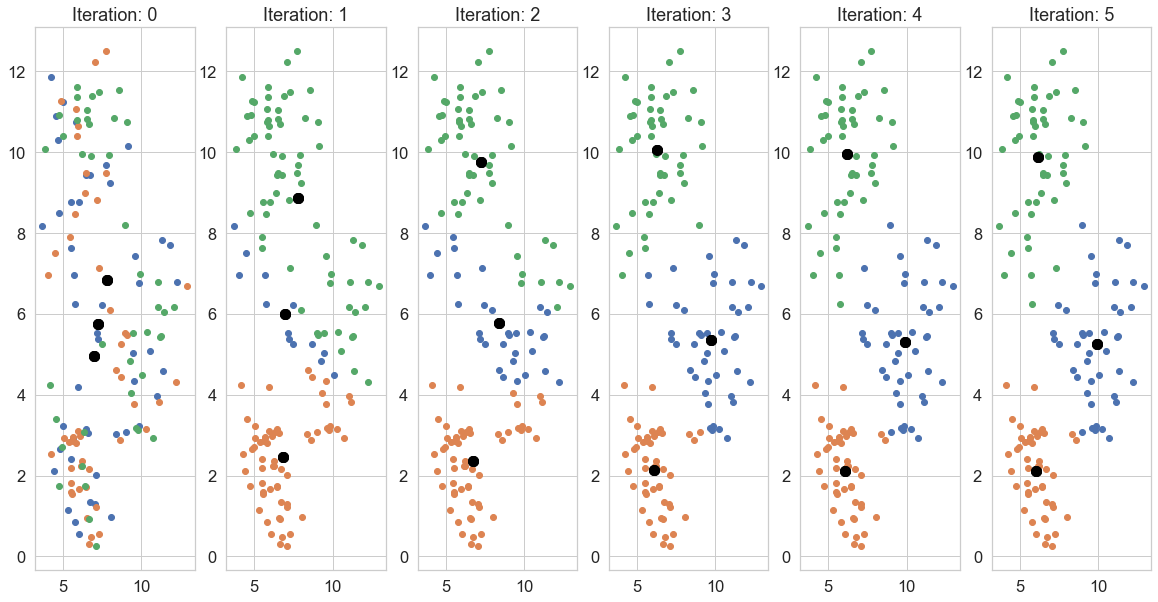

In [6]:
ITS = len(m.trajectory_labels)

fig, axes = plt.subplots(1, ITS, figsize=(20, 10))

for i in range(ITS):
    for j in range(NC):
        X_filt = Xtrain[m.trajectory_labels[i] == j]
        axes[i].set_title("Iteration: " + str(i))
        axes[i].scatter(X_filt[:,0], X_filt[:,1])
        axes[i].scatter(m.trajectory_centers[i][:,0], m.trajectory_centers[i][:,1], c="black", s=100)